<a href="https://colab.research.google.com/github/Sruthi-Shivaram/Data_Analytics/blob/main/DA_EXP_3/DA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Sruthi Shivaramakrishnan

UID: 2019110059

Batch: A

Branch: ETRX

Objective: Building Linear Regression model for given dataset.

Data set link : [Climate change dataset](https://www.kaggle.com/datasets/econdata/climate-change)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/climate_change.csv')
data_train=data[data.Year<=2006]
data_test=data[data.Year>2006]

In [ ]:
data.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [ ]:
data=data.drop(['Year','Month'],axis=1)
data_train=data_train.drop(['Year','Month'],axis=1)
data_test=data_test.drop(['Year','Month'],axis=1)

In [ ]:
data.describe()

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MEI       308 non-null    float64
 1   CO2       308 non-null    float64
 2   CH4       308 non-null    float64
 3   N2O       308 non-null    float64
 4   CFC-11    308 non-null    float64
 5   CFC-12    308 non-null    float64
 6   TSI       308 non-null    float64
 7   Aerosols  308 non-null    float64
 8   Temp      308 non-null    float64
dtypes: float64(9)
memory usage: 21.8 KB


In [ ]:
data.nunique()

MEI         294
CO2         298
CH4         303
N2O         304
CFC-11      307
CFC-12      307
TSI         302
Aerosols    155
Temp        242
dtype: int64

In [ ]:
data.isnull().sum()

MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

In [ ]:
from sklearn import datasets, linear_model, metrics

Coefficients:  [ 6.42053134e-02  6.45735927e-03  1.24041896e-04 -1.65280033e-02
 -6.63048889e-03  3.80810324e-03  9.31410835e-02 -1.53761324e+00]
Variance score: 0.7508932770523429
Mean Squared error:  0.009097810529180444


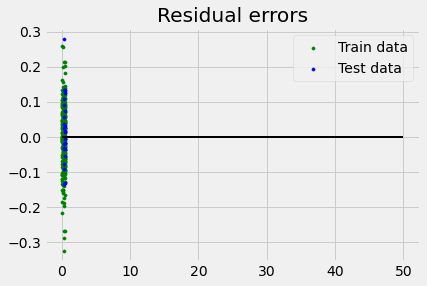

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error
  
# load the boston dataset
# defining feature matrix(X) and response vector(y)

X_train = pd.DataFrame(data_train, columns=['MEI','CO2', 'CH4', 'N2O', 'CFC-11','CFC-12','TSI','Aerosols'])
y_train=data_train['Temp']
X_test = pd.DataFrame(data_test, columns=['MEI','CO2', 'CH4', 'N2O', 'CFC-11','CFC-12','TSI','Aerosols'])
y_test=data_test['Temp']


  
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27,
                                                    #random_state=1)
  
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_train, y_train)))
y_pred = reg.predict(X_test)
errors = mean_squared_error(y_test,y_pred)
print("Mean Squared error: ",errors)

# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

The above output shows the coefficients and the error plot for the data.

The variance score [R2 value] is 0.7508

Mean squared error : 0.0909



In [ ]:
import statsmodels.api as sm
# If p-value < 0.05 -->Significant
# If p-value > 0.05 -->Not Significant

x_incl_cons = sm.add_constant(X_train)
model = sm.OLS(y_train, x_incl_cons)  #ordinary least square
results = model.fit()  #regresssion results
# results.params
# results.pvalues
pd.DataFrame({'coef': results.params , 'pvalue': round(results.pvalues,3)})


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,coef,pvalue
const,-124.594260,0.000
MEI,0.064205,0.000
CO2,0.006457,0.005
CH4,0.000124,0.810
N2O,-0.016528,0.055
CFC-11,-0.006630,0.000
CFC-12,0.003808,0.000
TSI,0.093141,0.000
Aerosols,-1.537613,0.000


The p values for CH4 and N2O are greater than 0.05 hence indicating that these attributes are insignificant.

The sample size taken is the entire training sample.

P value for CH4 = 0.810

P value for N2O = 0.055


In [ ]:
X_train.corr()

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols
MEI,1.000000,-0.041147,-0.033419,-0.050820,0.069000,0.008286,-0.154492,0.340238
CO2,-0.041147,1.000000,0.877280,0.976720,0.514060,0.852690,0.177429,-0.356155
CH4,-0.033419,0.877280,1.000000,0.899839,0.779904,0.963616,0.245528,-0.267809
N2O,-0.050820,0.976720,0.899839,1.000000,0.522477,0.867931,0.199757,-0.337055
CFC-11,0.069000,0.514060,0.779904,0.522477,1.000000,0.868985,0.272046,-0.043921
CFC-12,0.008286,0.852690,0.963616,0.867931,0.868985,1.000000,0.255303,-0.225131
TSI,-0.154492,0.177429,0.245528,0.199757,0.272046,0.255303,1.000000,0.052117
Aerosols,0.340238,-0.356155,-0.267809,-0.337055,-0.043921,-0.225131,0.052117,1.000000


Current scientific opinion is that nitrous oxide and CFC-11 are greenhouse gases: gases that are able to trap heat from the sun and contribute to the heating of the Earth. However, the regression coefficients of both the N2O and CFC-11 variables are negative, indicating that increasing atmospheric concentrations of either of these two compounds is associated with lower global temperatures.

The possible explanations for the above statement are:

1. Climate scientists are wrong that N2O and CFC-11 are greenhouse gases - this regression analysis constitutes part of a disproof.

The above statement can be rejected since the data was fit using the model and the coefficients of each of the N2O and CH4 are found to be negative supporting the given argument.

2. There is not enough data, so the regression coefficients being estimated are not accurate

The above statement can be rejected given the model accuracy and the dataset used. The accuracy is quite high and the dataset used is large enough to support the argument.

3. All of the gas concentration variables reflect human development - N2O and CFC.11 are correlated with other variables in the data set.

The above statement is true since the correlation matrix shows N2O and CFC 11 are highly correlated with the other features of the dataset since the coefficient values are quite high.
